### Import necessary libaries

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import the data using tf pipeline (train)

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
            '/content/drive/MyDrive/Fruits/train/orange',
            shuffle = True,
            image_size=(IMAGE_SIZE,IMAGE_SIZE),
            batch_size=BATCH_SIZE)

Found 3061 files belonging to 2 classes.


In [ ]:
len(dataset_train)

96

### Import the data using tf pipeline (test)

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
dataset_test = tf.keras.preprocessing.image_dataset_from_directory(
            '/content/drive/MyDrive/Fruits/test/orange',
            shuffle = True,
            image_size=(IMAGE_SIZE,IMAGE_SIZE),
            batch_size=BATCH_SIZE)

Found 791 files belonging to 2 classes.


In [ ]:
len(dataset_test)

25

In [ ]:
class_name_train = dataset_train.class_names
class_name_train

['freshoranges', 'rottenoranges']

In [ ]:
class_name_test = dataset_test.class_names
class_name_test

['freshoranges', 'rottenoranges']

### Visualization

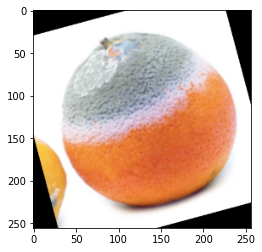

In [ ]:
for image_batch,image_label in dataset_train.take(1):
    plt.imshow(image_batch[0].numpy().astype('uint8'))

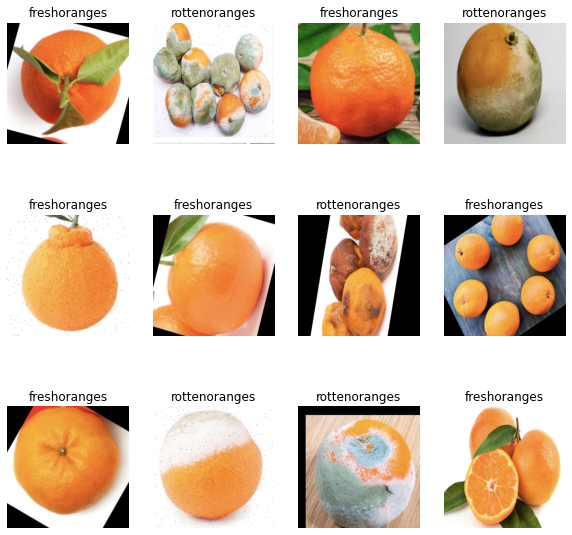

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch,image_label in dataset_train.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_name_train[image_label[i]])
        plt.axis('off')

### Using cache

In [ ]:
train = dataset_train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test = dataset_test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## Data augmentation

Data augmentation in data analysis are techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data.

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

### Resizing and Rescaling

Before we feed our images to network, we should be resizing it to the desired size. Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256). This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.

You might be thinking why do we need to resize (256,256) image to again (256,256). You are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. At that time somone can supply an image that is not (256,256) and this layer will resize it

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

### Model building

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train,
    batch_size=BATCH_SIZE,
    verbose=1,
    epochs=50,
)

Epoch 1/50
96/96 [==============================] - 212s 136ms/step - loss: 0.4302 - accuracy: 0.8112
Epoch 2/50
96/96 [==============================] - 12s 127ms/step - loss: 0.2609 - accuracy: 0.9095
Epoch 3/50
96/96 [==============================] - 12s 127ms/step - loss: 0.2161 - accuracy: 0.9288
Epoch 4/50
96/96 [==============================] - 12s 126ms/step - loss: 0.2052 - accuracy: 0.9285
Epoch 5/50
96/96 [==============================] - 12s 127ms/step - loss: 0.1470 - accuracy: 0.9520
Epoch 6/50
96/96 [==============================] - 12s 127ms/step - loss: 0.1590 - accuracy: 0.9503
Epoch 7/50
96/96 [==============================] - 12s 127ms/step - loss: 0.1195 - accuracy: 0.9605
Epoch 8/50
96/96 [==============================] - 12s 127ms/step - loss: 0.1270 - accuracy: 0.9605
Epoch 9/50
96/96 [==============================] - 12s 127ms/step - loss: 0.1443 - accuracy: 0.9516
Epoch 10/50
96/96 [==============================] - 12s 128ms/step - loss: 0.1212 - accur

In [ ]:
model.evaluate(test)

25/25 [==============================] - 87s 74ms/step - loss: 0.0348 - accuracy: 0.9848


[0.03475049510598183, 0.984829306602478]

actual image : rottenoranges
predicted image : rottenoranges


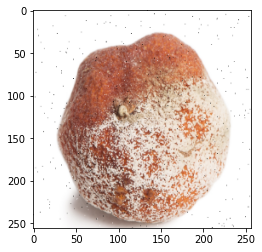

In [ ]:
for image_batch,image_label in test.take(1):
  plt.imshow(image_batch[0].numpy().astype('uint8'))
  print('actual image :',class_name_test[image_label[0].numpy()])
  pred = model.predict(image_batch)
  print('predicted image :',class_name_test[np.argmax(pred[0])])

In [ ]:
#Write a function for inference
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name_test[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

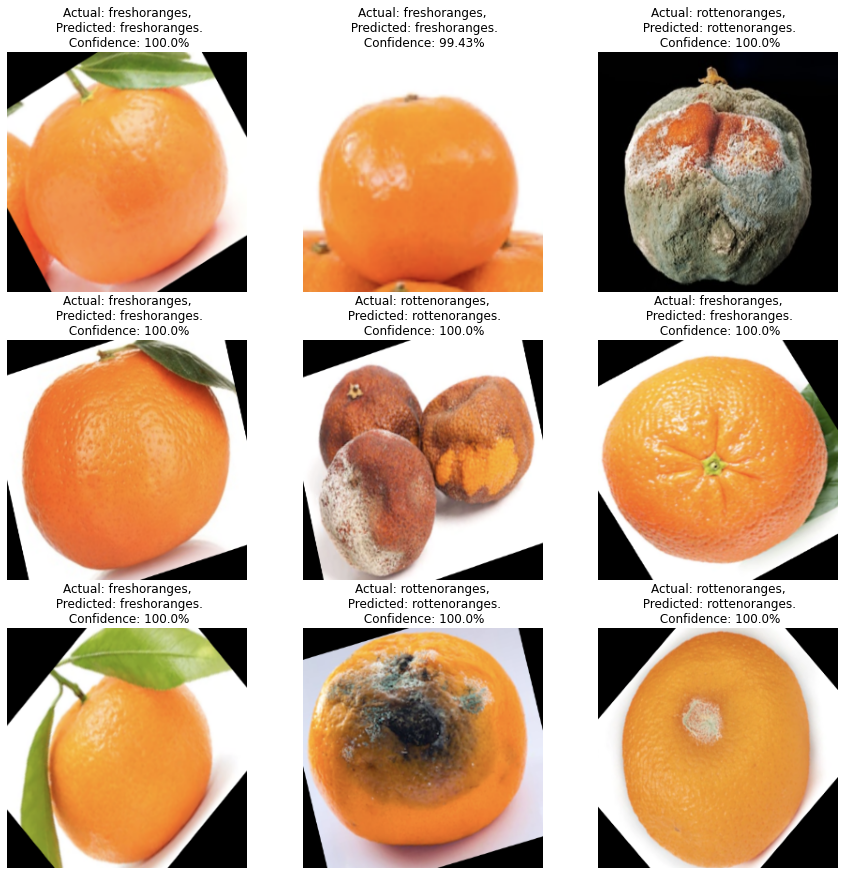

In [ ]:
#Now run inference on few sample images
plt.figure(figsize=(15, 15))
for images, labels in test.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name_test[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
#Saving the Model
import os
model_version=max([int(i) for i in os.listdir("../content/drive/MyDrive/Colab Notebooks/potato_project/models") + [0]])+1
model.save(f"../content/drive/MyDrive/Fruits/model/{model_version}")

INFO:tensorflow:Assets written to: ../content/drive/MyDrive/Fruits/model/2/assets
